In [29]:
import pandas as pd
import numpy as np

def load_diabetes_data(path = "/Users/alexbean/Desktop/samadult.csv"):
    # load in the original data
    diabetes_orig = pd.read_csv(path)

    # take just one person from each household
    diabetes = diabetes_orig.groupby("HHX") \
      .sample(1, random_state=24648765) \
      .reset_index() \
      .copy()
    # add an id column
    diabetes["id"] = np.arange(len(diabetes.index))
    # create the house_family_person_id column by joining together three ID columns
    diabetes["house_family_person_id"] = diabetes.apply(lambda x: "_".join(x[["HHX", "FMX", "FPX"]].astype(int).astype(str)), 
                                                        axis=1)
    # create the diabetes column
    diabetes["diabetes"] = (diabetes["DIBEV1"] == 1).astype(int)
    # create coronary heart disease column
    diabetes["coronary_heart_disease"] = (diabetes["CHDEV"] == 1).astype(int)
    # create hypertension column
    diabetes["hypertension"] = (diabetes["HYPEV"] == 1).astype(int)
    # create heart_condition column
    diabetes["heart_condition"] = (diabetes["HRTEV"] == 1).astype(int)
    # create cancer column
    diabetes["cancer"] = (diabetes["CANEV"] == 1).astype(int)
    # create family_history_diabetes column
    diabetes["family_history_diabetes"] = (diabetes["DIBREL"] == 1).astype(int)
    # create had_high_cholesterol
    diabetes["had_high_cholesterol"] = (diabetes["CHLYR"] == 1).astype(int)
   
    
    # rename remaining relevant columns
    diabetes = diabetes.rename(columns={"AGE_P": "age",
                                      "SMKEV": "smoker",
                                      "SEX": "sex",
                                      "AWEIGHTP": "weight",
                                      "BMI": "bmi",
                                      "AHEIGHT": "height",
                                      "WRKCATA": "class_of_worker",
                                      "YRSWRKPA": "years_on_job",
                                      "EVERWRK": "ever_worked",
                                      "ONEJOB": "more_than_one_job",
                                      "KIDWKYR": "kidney_condition", #weak/failing
                                      "LIVYR": "liver_condition",
                                      "AHCAFYR1": "cant_afford_meds",
                                      "ARX12_1": "skipped_meds",
                                      "MRACRPI2": "non_hispanic_race",
                                      "HISPAN_I": "hispanic"})

    # select just the relevant columns
    diabetes = diabetes[["house_family_person_id",
                        "diabetes",
                        "age",
                        "smoker",
                        "sex",
                        "coronary_heart_disease",
                        "weight",
                        "had_high_cholesterol",
                        "class_of_worker",
                        "years_on_job", 
                        "height",
                        "hypertension",
                        "heart_condition",
                        "cancer",
                        "family_history_diabetes",
                        "ever_worked",
                        "more_than_one_job",
                        "kidney_condition",
                        "liver_condition",
                        "cant_afford_meds",
                        "skipped_meds",
                        "non_hispanic_race",
                        "hispanic"]]
    return(diabetes)

df = load_diabetes_data()

In [30]:
df.head()

,house_family_person_id,diabetes,age,smoker,sex,coronary_heart_disease,weight,had_high_cholesterol,class_of_worker,years_on_job,...,cancer,family_history_diabetes,ever_worked,more_than_one_job,kidney_condition,liver_condition,cant_afford_meds,skipped_meds,non_hispanic_race,hispanic
0,1_2_1,0,24,2,2,0,125,0,1.0,2.0,...,0,0,NaN,2.0,2,2,2,NaN,2,12
1,2_1_1,0,76,2,1,0,190,0,3.0,25.0,...,0,0,1.0,NaN,2,2,2,NaN,1,12
2,3_1_2,0,36,2,2,0,225,0,1.0,2.0,...,0,1,NaN,2.0,2,2,1,2.0,1,3
3,5_1_1,0,35,1,2,0,240,0,1.0,1.0,...,0,1,NaN,2.0,2,2,1,1.0,1,3
4,10_1_5,0,20,2,2,0,103,0,NaN,NaN,...,0,1,2.0,NaN,2,2,2,NaN,1,1


In [31]:
df.describe().round(2)

,diabetes,age,smoker,sex,coronary_heart_disease,weight,had_high_cholesterol,class_of_worker,years_on_job,height,...,cancer,family_history_diabetes,ever_worked,more_than_one_job,kidney_condition,liver_condition,cant_afford_meds,skipped_meds,non_hispanic_race,hispanic
count,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,31047.00,31047.00,32499.00,...,32499.00,32499.00,14033.00,18466.00,32499.00,32499.00,32499.00,21890.00,32499.00,32499.00
mean,0.11,51.05,1.61,1.55,0.06,251.11,0.22,1.80,11.89,68.82,...,0.11,0.35,1.11,1.91,1.98,1.99,1.99,1.94,1.82,10.98
std,0.31,18.51,0.61,0.50,0.23,240.28,0.42,1.44,13.71,8.46,...,0.32,0.48,0.36,0.36,0.23,0.24,0.62,0.26,2.79,2.90
min,0.00,18.00,1.00,1.00,0.00,100.00,0.00,1.00,0.00,59.00,...,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,0.00,35.00,1.00,1.00,0.00,150.00,0.00,1.00,2.00,64.00,...,0.00,0.00,1.00,2.00,2.00,2.00,2.00,2.00,1.00,12.00
50%,0.00,52.00,2.00,2.00,0.00,176.00,0.00,1.00,8.00,67.00,...,0.00,0.00,1.00,2.00,2.00,2.00,2.00,2.00,1.00,12.00
75%,0.00,66.00,2.00,2.00,0.00,214.00,0.00,2.00,19.00,70.00,...,0.00,1.00,1.00,2.00,2.00,2.00,2.00,2.00,1.00,12.00
max,1.00,85.00,9.00,2.00,1.00,999.00,1.00,9.00,99.00,99.00,...,1.00,1.00,9.00,9.00,9.00,9.00,9.00,9.00,17.00,12.00


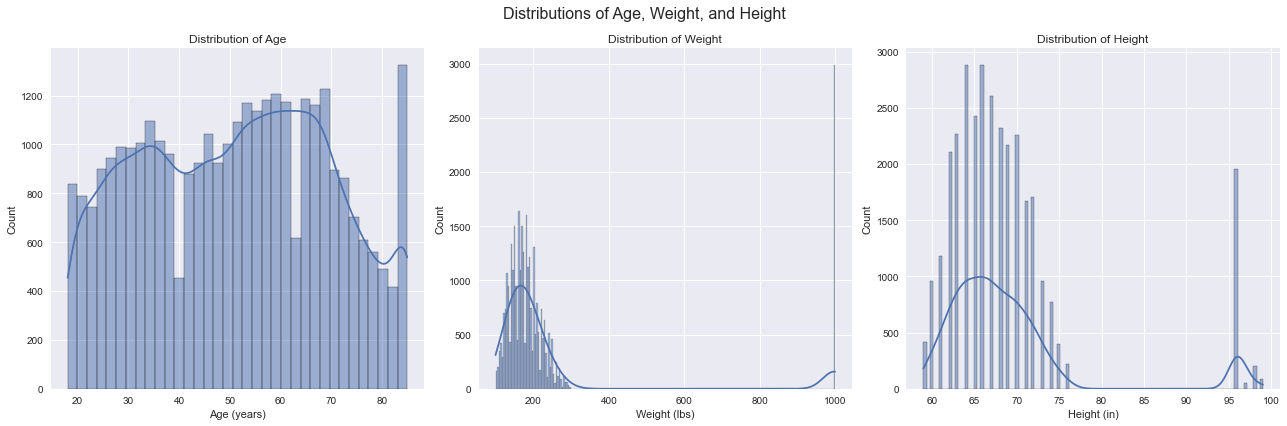

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distributions of Age, Weight, and Height', fontsize=16)

# Histogram for Age
sns.histplot(data=df, x='age', kde=True, ax=ax1)
ax1.set_title('Distribution of Age')
ax1.set_xlabel('Age (years)')
ax1.set_ylabel('Count')

# Histogram for Weight
sns.histplot(data=df, x='weight', kde=True, ax=ax2)
ax2.set_title('Distribution of Weight')
ax2.set_xlabel('Weight (lbs)')
ax2.set_ylabel('Count')

# Histogram for Height
sns.histplot(data=df, x='height', kde=True, ax=ax3)
ax3.set_title('Distribution of Height')
ax3.set_xlabel('Height (in)')
ax3.set_ylabel('Count')

plt.tight_layout()
plt.show()

#not much clarity for 85+
#for weight at or above 300 lbs, fill with NA (not expected from file layout reference)
#for height at or above 77 in, fll with NA (not expected from file layout reference)

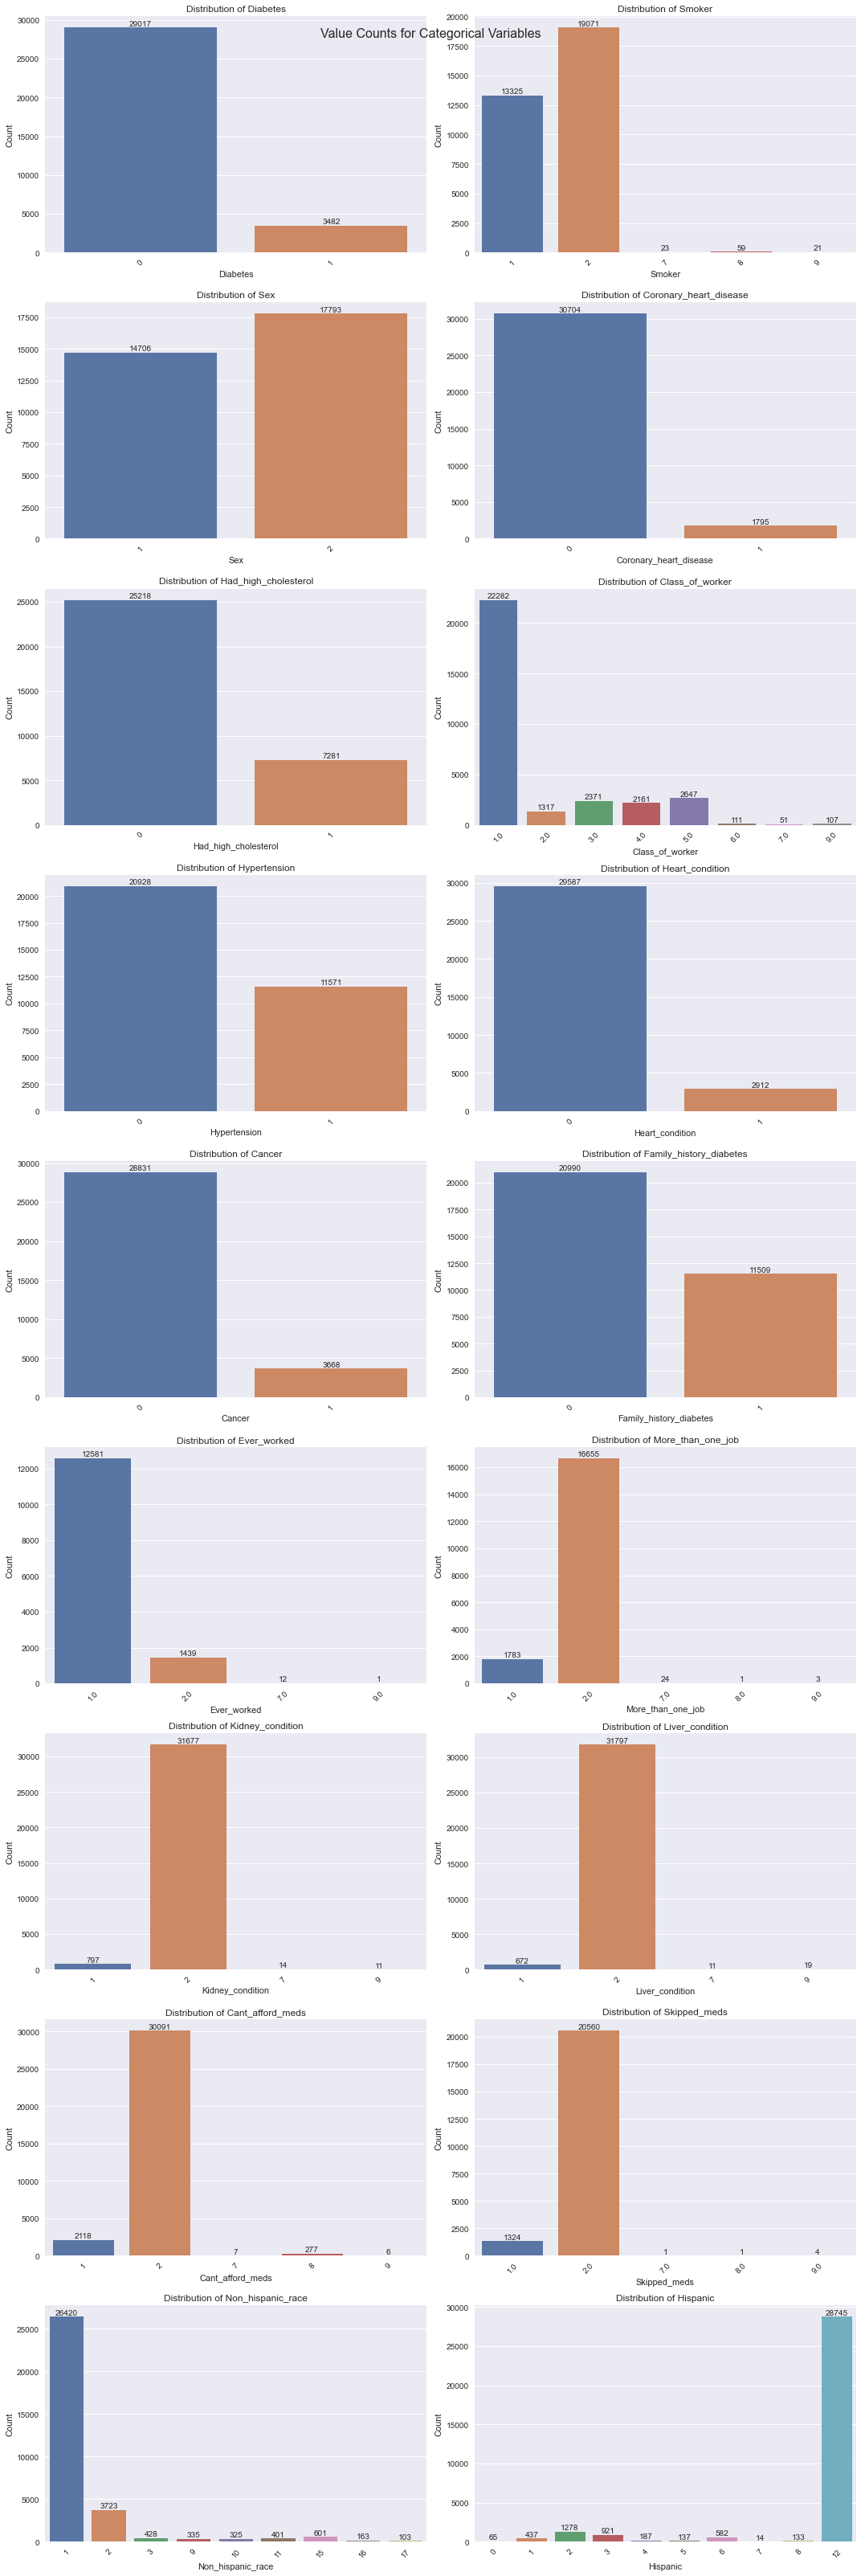

In [33]:
columns_to_plot = [
                        "diabetes",
                        "smoker",
                        "sex",
                        "coronary_heart_disease",
                        "had_high_cholesterol",
                        "class_of_worker",
                        "hypertension",
                        "heart_condition",
                        "cancer",
                        "family_history_diabetes",
                        "ever_worked",
                        "more_than_one_job",
                        "kidney_condition",
                        "liver_condition",
                        "cant_afford_meds",
                        "skipped_meds",
                        "non_hispanic_race",
                        "hispanic"]

plt.style.use('seaborn')
sns.set_palette("deep")

# Create subplots based on the number of columns to plot
n_cols = 2
n_rows = (len(columns_to_plot) + 1) // 2  # Round up to the nearest integer
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.suptitle('Value Counts for Categorical Variables', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create value count plots
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Distribution of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')
    
    # Rotate x-axis labels if they're too long
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add value labels on top of each bar
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 5), textcoords='offset points')

# Remove any unused subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#refused, ascertain, and don't know can be pooled as 'other'

In [ ]:
# New BMI
df['bmi'] = df['weight'] / (df['height'] ** 2)*703
df['bmi'] = df['bmi'].round(2)


display(df.head())